In [1]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [2]:
stock = yf.Ticker("META")
stock = stock.history(period='2y')


In [3]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-03 00:00:00-04:00,162.356371,169.192315,161.238673,168.453842,31721900,0.0,0.0
2022-08-04 00:00:00-04:00,167.954866,171.796961,166.457942,170.220215,23938200,0.0,0.0
2022-08-05 00:00:00-04:00,166.647554,171.258075,165.459992,166.767303,25832700,0.0,0.0
2022-08-08 00:00:00-04:00,167.655478,177.145970,166.787267,169.900864,27299100,0.0,0.0
2022-08-09 00:00:00-04:00,168.603524,169.182336,166.258352,168.184387,18655100,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-29 00:00:00-04:00,469.880005,473.959991,465.019989,465.709991,11339600,0.0,0.0
2024-07-30 00:00:00-04:00,467.000000,472.730011,456.700012,463.190002,11390400,0.0,0.0
2024-07-31 00:00:00-04:00,471.019989,476.500000,466.750000,474.829987,24285800,0.0,0.0


In [4]:
del stock['Dividends']
del stock['Stock Splits']

In [5]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-03 00:00:00-04:00,162.356371,169.192315,161.238673,168.453842,31721900
2022-08-04 00:00:00-04:00,167.954866,171.796961,166.457942,170.220215,23938200
2022-08-05 00:00:00-04:00,166.647554,171.258075,165.459992,166.767303,25832700
2022-08-08 00:00:00-04:00,167.655478,177.145970,166.787267,169.900864,27299100
2022-08-09 00:00:00-04:00,168.603524,169.182336,166.258352,168.184387,18655100
...,...,...,...,...,...
2024-07-29 00:00:00-04:00,469.880005,473.959991,465.019989,465.709991,11339600
2024-07-30 00:00:00-04:00,467.000000,472.730011,456.700012,463.190002,11390400
2024-07-31 00:00:00-04:00,471.019989,476.500000,466.750000,474.829987,24285800


<Axes: xlabel='Date'>

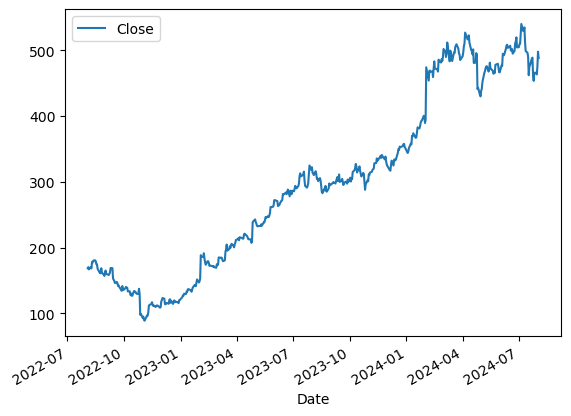

In [6]:
stock.plot.line(y="Close")

In [23]:
stock["Next Days Close"] = stock['Close'].shift(-1)

/var/folders/lj/3lv9gjn149ldtz57dv7ygp4c0000gn/T/ipykernel_23931/3113319731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock["Next Days Close"] = stock['Close'].shift(-1)


In [25]:
stock

,Open,High,Low,Close,Volume,Next Days Close,change
Date,,,,,,,
2022-08-03 00:00:00-04:00,162.356371,169.192315,161.238673,168.453842,31721900,170.220215,1
2022-08-04 00:00:00-04:00,167.954866,171.796961,166.457942,170.220215,23938200,166.767303,0
2022-08-05 00:00:00-04:00,166.647554,171.258075,165.459992,166.767303,25832700,169.900864,1
2022-08-08 00:00:00-04:00,167.655478,177.145970,166.787267,169.900864,27299100,168.184387,0
2022-08-09 00:00:00-04:00,168.603524,169.182336,166.258352,168.184387,18655100,177.974274,1
...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,464.200012,469.769989,459.420013,465.700012,14222400,465.709991,1
2024-07-29 00:00:00-04:00,469.880005,473.959991,465.019989,465.709991,11339600,463.190002,0
2024-07-30 00:00:00-04:00,467.000000,472.730011,456.700012,463.190002,11390400,474.829987,1


In [26]:
stock['change'] = (stock['Next Days Close'] > stock['Close']).astype(int)

/var/folders/lj/3lv9gjn149ldtz57dv7ygp4c0000gn/T/ipykernel_23931/3235160744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['change'] = (stock['Next Days Close'] > stock['Close']).astype(int)


In [27]:
stock

,Open,High,Low,Close,Volume,Next Days Close,change
Date,,,,,,,
2022-08-03 00:00:00-04:00,162.356371,169.192315,161.238673,168.453842,31721900,170.220215,1
2022-08-04 00:00:00-04:00,167.954866,171.796961,166.457942,170.220215,23938200,166.767303,0
2022-08-05 00:00:00-04:00,166.647554,171.258075,165.459992,166.767303,25832700,169.900864,1
2022-08-08 00:00:00-04:00,167.655478,177.145970,166.787267,169.900864,27299100,168.184387,0
2022-08-09 00:00:00-04:00,168.603524,169.182336,166.258352,168.184387,18655100,177.974274,1
...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,464.200012,469.769989,459.420013,465.700012,14222400,465.709991,1
2024-07-29 00:00:00-04:00,469.880005,473.959991,465.019989,465.709991,11339600,463.190002,0
2024-07-30 00:00:00-04:00,467.000000,472.730011,456.700012,463.190002,11390400,474.829987,1


In [11]:
# Drop rows with NaN target values
stock = stock.dropna(subset=['Next Days Close', 'change'])

# Split our preprocessed data into our features and target arrays
y = stock['change']
X = stock.drop(columns=['change'])

# Preserve the index of the original DataFrame
original_index = X.index

In [12]:
#Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
# Rebuild X_test DataFrame to restore index information
X_test_df = pd.DataFrame(X_test, index=original_index[-len(X_test):], columns=X.columns)

In [14]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

/Users/keycaughey/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.5117 - loss: 0.7088
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.4714 - loss: 0.6971
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5140 - loss: 0.6904
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.4803 - loss: 0.6944
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - accuracy: 0.5462 - loss: 0.6891
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.5626 - loss: 0.6833
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.5379 - loss: 0.6881
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.5393 - loss: 0.6824
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.5055 - loss: 0.6884
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.5755 - loss: 0.6831
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.5763 - loss: 0.6779
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.8822 - loss: 0.4198
Epoch 69/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8441 - loss: 0.4327
Epoch 70/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.8527 - loss: 0.4126
Epoch 71/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.8624 - loss: 0.4022
Epoch 72/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.8386 - loss: 0.4146
Epoch 73/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.8799 - loss: 0.3956
Epoch 74/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8477 - loss: 0.4028
Epoch 75/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.8651 - loss: 0.3947
Epoch 76/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.8802 - loss: 0.3929
Epoch 77/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.8836 - loss: 0.3709
Epoch 78/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.9018 - loss: 0.3876
Epoch 79/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 48

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_df, y_test)
print(f'Test Loss: {model_loss}, Test Accuracy: {model_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.8714 - loss: 0.3082
Test Loss: 0.291832834482193, Test Accuracy: 0.8712871074676514


In [18]:
# Make predictions
predictions = model.predict(X_test_df).round().flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [19]:
# Create a DataFrame for predictions with the index of X_test_df
predictions_df = pd.DataFrame(predictions, index=X_test_df.index, columns=['Predictions'])

In [20]:
precision_score(y_test,predictions)

0.8620689655172413

<Axes: title={'center': 'Actual vs. Predicted'}, xlabel='Date'>

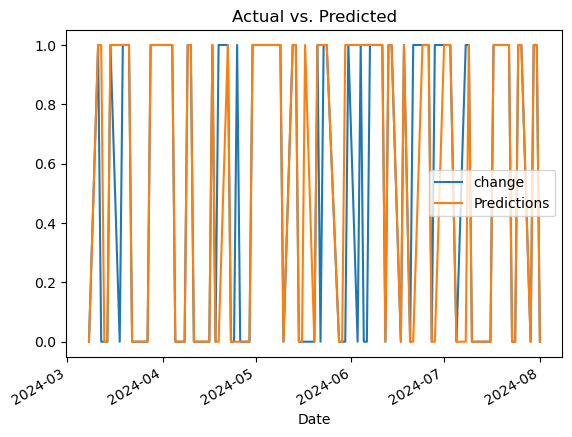

In [21]:
# Combine actual values and predictions
combined = pd.concat([y_test, predictions_df], axis=1)

# Plot the combined DataFrame
combined.plot(title='Actual vs. Predicted')

In [22]:
predictions_df.value_counts()

Predictions
1.0            58
0.0            43
Name: count, dtype: int64